<a href="https://colab.research.google.com/github/anafortunato27/transformadaZ/blob/main/SIMULA%C3%87%C3%83O_DA_RESPOSTA_AO_DEGRAU_DE_UM_SISTEMA_DE_2%C2%AA_ORDEM_DISCRETO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SIMULAÇÃO DA RESPOSTA AO DEGRAU DE UM SISTEMA DE 2ª ORDEM DISCRETO**
---

---

**Aluna:** Ana Clara Fortunato de Souza

**Disciplina:** Métodos Matemáticos Lineares

**Matrícula:** 202302520

---

y[n] + a*y[n-1] + b*y[n-2] = c*x[n]


x[n] = u[n] (degrau)

/tmp/ipython-input-232731933.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(a), float(b)


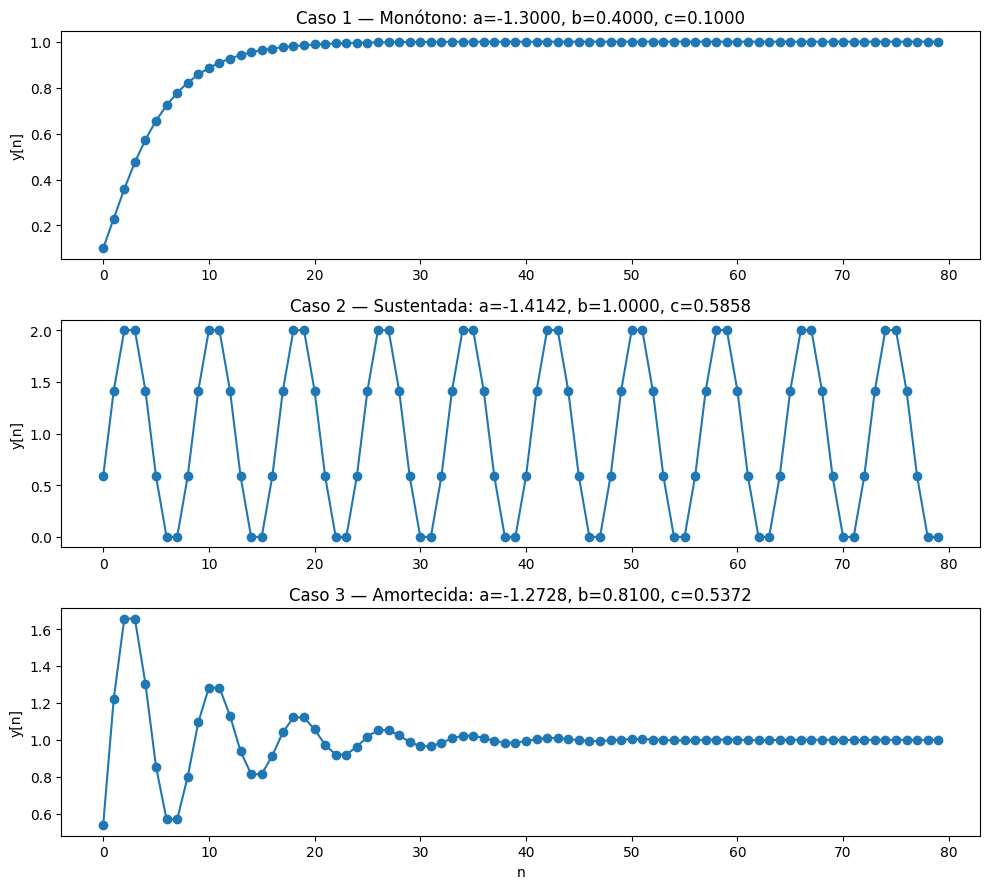

Coeficientes dos três casos:
Monótono:   a = -1.3  b = 0.4  c = 0.09999999999999998
Sustentada: a = -1.4142135623730951  b = 1.0  c = 0.5857864376269049
Amortecida: a = -1.2727922061357857  b = 0.81  c = 0.5372077938642144


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate(a, b, c, N=80):
    x = np.ones(N)            # entrada degrau
    y = np.zeros(N)           # saída
    for n in range(N):
        y_n1 = y[n-1] if n-1 >= 0 else 0.0
        y_n2 = y[n-2] if n-2 >= 0 else 0.0
        y[n] = -a*y_n1 - b*y_n2 + c*x[n]
    return y

def coeffs_from_roots(r1, r2):
    a = -(r1 + r2)
    b = r1 * r2
    return float(a), float(b)

def make_case_from_polar(r_mag, theta):
    r1 = r_mag * np.exp(1j * theta)
    r2 = np.conj(r1)
    a, b = coeffs_from_roots(r1, r2)
    c = 1 + a + b           # garante regime permanente = 1
    return a, b, c

# ----- DEFINIÇÃO DOS 3 CASOS -----

# Caso 1: Monótono (raízes reais menores que 1)
r1, r2 = 0.8, 0.5
a1, b1 = coeffs_from_roots(r1, r2)
c1 = 1 + a1 + b1
y1 = simulate(a1, b1, c1)

# Caso 2: Oscilação sustentada (mod = 1)
theta = np.pi/4
a2, b2, c2 = make_case_from_polar(1.0, theta)
y2 = simulate(a2, b2, c2)

# Caso 3: Oscilação amortecida (mod < 1)
a3, b3, c3 = make_case_from_polar(0.9, theta)
y3 = simulate(a3, b3, c3)

# ----- PLOT -----
t = np.arange(len(y1))
plt.figure(figsize=(10, 9))

plt.subplot(3,1,1)
plt.plot(t, y1, marker='o')
plt.title(f'Caso 1 — Monótono: a={a1:.4f}, b={b1:.4f}, c={c1:.4f}')
plt.ylabel('y[n]')

plt.subplot(3,1,2)
plt.plot(t, y2, marker='o')
plt.title(f'Caso 2 — Sustentada: a={a2:.4f}, b={b2:.4f}, c={c2:.4f}')
plt.ylabel('y[n]')

plt.subplot(3,1,3)
plt.plot(t, y3, marker='o')
plt.title(f'Caso 3 — Amortecida: a={a3:.4f}, b={b3:.4f}, c={c3:.4f}')
plt.xlabel('n')
plt.ylabel('y[n]')

plt.tight_layout()
plt.show()

# Exibe coeficientes no console
print("Coeficientes dos três casos:")
print("Monótono:   a =", a1, " b =", b1, " c =", c1)
print("Sustentada: a =", a2, " b =", b2, " c =", c2)
print("Amortecida: a =", a3, " b =", b3, " c =", c3)


from IPython.display import Markdown

Markdown(r"""
# Explicação da Simulação

## 1. Equação da Diferença
A dinâmica do sistema é dada por:

\[
y[n] + a\,y[n-1] + b\,y[n-2] = c\,x[n]
\]

Com entrada sendo um **degrau unitário**:

\[
x[n] = u[n] = 1 \quad (n \ge 0)
\]

---

## 2. Como os coeficientes afetam o comportamento
A parte homogênea depende da equação característica:

\[
r^2 + a r + b = 0
\]

Se as raízes são:

- **reais e entre 0 e 1** → resposta monotônica (sem oscilar)
- **complexas com |r| < 1** → oscilações amortecidas
- **complexas com |r| = 1** → oscilações sustentadas
- **complexas com |r| > 1** → instável (não usamos)

As relações são:

\[
a = -(r_1 + r_2), \qquad b = r_1 r_2
\]

---

## 3. Ajustando o valor final (regime permanente)

Para entrada degrau:

\[
y_{ss} = \frac{c}{1 + a + b}
\]

Se queremos:

\[
y_{ss} = 1
\]

Escolhemos:

\[
c = 1 + a + b
\]

---

## 4. Os três casos simulados

### **Caso 1 — Raízes reais \((0.8 \text{ e } 0.5)\)**  
Sistema totalmente estável e sem oscilações.  
Resposta cresce suavemente até 1.

### **Caso 2 — Raízes complexas com módulo 1**  
Oscilações sustentadas, mesma amplitude sempre.  
Frequência definida por \( \theta = \pi/4 \).

### **Caso 3 — Raízes complexas com módulo 0.9**  
Oscilações aparecem, mas decaem com o tempo até chegar em 1.

---

## 5. Simulação numérica
Usamos a forma recursiva:

\[
y[n] = -a y[n-1] - b y[n-2] + c\,x[n]
\]

Com condições iniciais:

\[
y[-1]=0,\quad y[-2]=0.
\]

Isso replica exatamente a definição da equação dada.

---
